# TEA Campus Performance Data Analysis

## Step 1: Data Exploration

### [Data Source](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download.html)

Here we will download Campus Level data Accountability Summary.  A [reference](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download/camprate.html) to explain available columns.  We want columns that will either identify a school, measure school performance, or serve as features that might predict school performance.

In [290]:
import pandas as pd

df = pd.read_csv('./data/CAMPRATE.csv', 
                 usecols=['CAMPUS','CAMPNAME','DISTRICT', 
                                                 'DISTNAME', 'CDALLS', 
                                                 'C_RATING', 'CD1S', 'CD1G', 
                                                 'CD2A', 'CD2AG', 'CD2AS', 
                                                 'CD3', 'CD3G', 'CD3S', 
                                                 'GRDTYPE', 'CFLCHART', 'CFLNEWCAMP', 
                                                 'CPEMALLP', 'CPETALLC', 'CPETECHP', 
                                                 'CPETECOP', 'CPETLEPP', 'CPETSPEP', 'CPETSTEP'])
df.rename(columns={'CDALLS':'OVERALL_SCALED_SCORE', 
                   'C_RATING':'OVERALL_RATING', 
                   'CD1S':'STUDENT_ACHIEVEMENT_SCALED', 
                   'CD1G':'STUDENT_ACHIEVEMENT_RATING', 
                   'CD2A':'SCHOOL_PROGRESS_ACAD_GROWTH_RAW', 
                   'CD2AG':'SCHOOL_PROGRESS_ACAD_GROWTH_RATING', 
                   'CD2AS':'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED', 
                   'CD3':'CLOSING_GAPS_RAW', 
                   'CD3G':'CLOSING_GAPS_RATING', 
                   'CD3S':'CLOSING_GAPS_SCALED', 
                   'GRDTYPE':'SCHOOL_TYPE',
                   'CFLCHART':'FLAG_CHARTER', 
                   'CFLNEWCAMP':'FLAG_NEW', 
                   'CPEMALLP':'STUDENT_MOBILITY_PCT',
                   'CPETALLC':'STUDENT_COUNT',
                   'CPETECHP':'ECHS_PCT', 
                   'CPETECOP':'ECON_DISADV_PCT', 
                   'CPETLEPP':'LEP_PCT', 
                   'CPETSPEP':'SPED_PCT', 
                   'CPETSTEP':'TSTEM_PCT'}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,.,.,Not Rated,.,.,Not Rated,.,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Empty cells are filled with a . which is a string character.  We can't convert values to floats without replacing the . symbols with NaNs.

In [291]:
import numpy as np
df.replace({'.':np.nan, 'Y':1, 'N':0}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,NaN,NaN,Not Rated,NaN,NaN,Not Rated,NaN,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Now we need to convert the numeric columns from strings to integers or floats.

In [292]:
df = df.astype({'OVERALL_SCALED_SCORE': float,
           'STUDENT_ACHIEVEMENT_SCALED': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_RAW': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED': float,
           'CLOSING_GAPS_RAW': float,
           'CLOSING_GAPS_SCALED': float,
           'STUDENT_MOBILITY_PCT': float,
           'STUDENT_COUNT': 'int64',
           'ECHS_PCT': float,
           'ECON_DISADV_PCT': float,
           'LEP_PCT': float,
           'SPED_PCT': float,
           'TSTEM_PCT': float})

### Total number of schools in the dataset

In [293]:
df.shape[0]

8838

### Look at the distribution of performance data.

Text(0.5, 0, 'Overall Scaled Score')

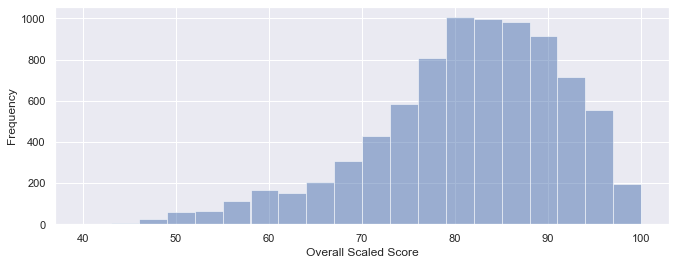

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})

ax1 = df['OVERALL_SCALED_SCORE'].plot.hist(bins=20, alpha=0.5)
ax1.set_xlabel('Overall Scaled Score')

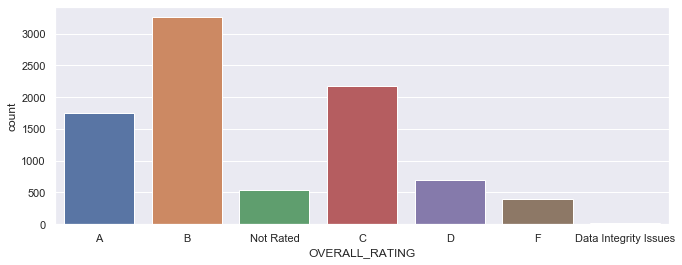

In [295]:
ax2 = sns.countplot(x="OVERALL_RATING", data=df)

#### Let's look at correlations between all of our variables

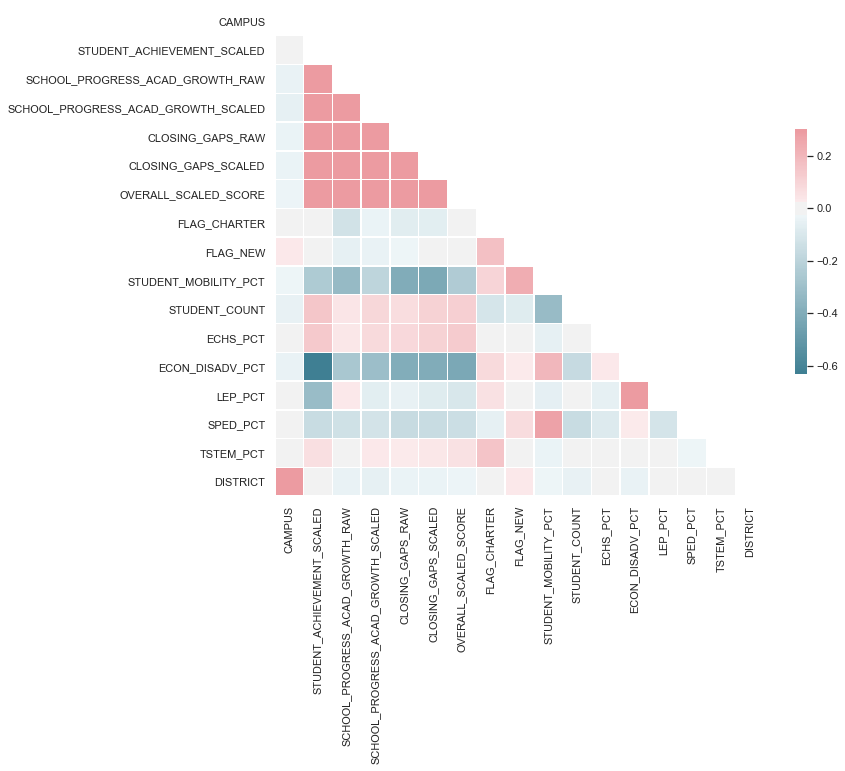

In [296]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Some insights we can get from the above plot - looking for correlations between school demographic or type data and performance data.  More red means a positive correlation and more green means a negative correlation.  

Start with overall scaled score - we see slight positive correlations with TSTEM percentage, early college high school percentage, student count; negative correlations with percentage economically disadvantaged, SPED, LEP, and student mobility; and no correlation with charter status or new school status.  

# Looking for Outliers

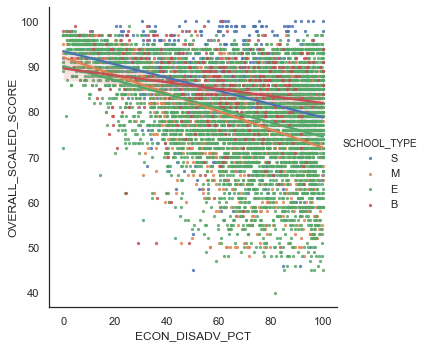

In [297]:
sns.lmplot(x="ECON_DISADV_PCT", y="OVERALL_SCALED_SCORE", data=df, fit_reg=True, 
           hue='SCHOOL_TYPE', scatter_kws={"s": 5})

#### It looks like for schools with a higher percentage of economically disadvantaged students there is a wide range of overall scaled scores.  How much of this is accounted for by school type or other characteristics?  Can we find schools that are doing better than others with the same characteristics?  We can use different types of models that consider all characteristics and find schools that do significantly better than their predicted score.

## Step 2: Prepare Data

In [298]:
#Drop schools that do not have an overall scaled score
df.dropna(subset=['OVERALL_SCALED_SCORE'], inplace=True)

In [299]:
#Encode school type data using one hot encoding
df['SCHOOL_TYPE_E'] = pd.get_dummies(df['SCHOOL_TYPE'])['E']
df['SCHOOL_TYPE_M'] = pd.get_dummies(df['SCHOOL_TYPE'])['M']
df['SCHOOL_TYPE_S'] = pd.get_dummies(df['SCHOOL_TYPE'])['S']

In [300]:
#Randomize the data
df = df.reindex(np.random.permutation(df.index))

In [301]:
#Set features and target
features = ['SCHOOL_TYPE_E', 'SCHOOL_TYPE_M','SCHOOL_TYPE_S', 'FLAG_CHARTER', 'FLAG_NEW', 
            'STUDENT_COUNT', 'ECHS_PCT', 'ECON_DISADV_PCT', 'LEP_PCT', 'SPED_PCT', 'TSTEM_PCT']
target = ['OVERALL_SCALED_SCORE']

In [302]:
#Make arrays for training and testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

X_train = df_train[features].values
X_test = df_test[features].values
y_train = np.ravel(df_train[target].values)
y_test = np.ravel(df_test[target].values)

print("{} schools in training set".format(X_train.shape[0]))
print("{} schools in test set".format(X_test.shape[0]))

6637 schools in training set
1660 schools in test set


## Step 3: Fit the Model

In [303]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(verbose=True, min_samples_leaf=30)
RF_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

## Step 4: Analyze the Results

In [304]:
#Use the trained model to predict overall scaled score on schools in test set
y_pred = RF_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [305]:
#Get performance metrics
from sklearn.metrics import mean_squared_error

print("Root mean squared error on test set: {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))

Root mean squared error on test set: 8.593286331715433


Text(0.5, 0, 'Residual')

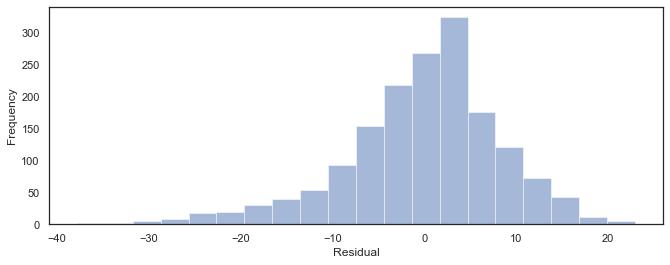

In [306]:
#Look at the distribution of residuals
res = y_test - y_pred
ax3 = pd.DataFrame(res).plot.hist(bins=20, alpha=0.5, legend=False)
ax3.set_xlabel('Residual')

Text(0, 0.5, 'Actual Score')

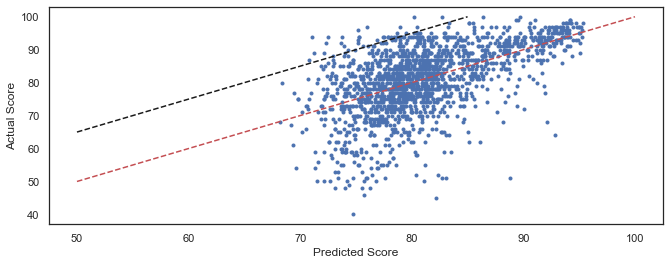

In [307]:
#Plot actual score vs predicted score.  
plt.plot(y_pred, y_test, '.')
plt.plot([50,100],[50,100],'r--')
plt.plot([50,85],[65,100], 'k--')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

Red dashed line is the one to one line - points above scored higher than their prediction.
Black dashed line is the plus 15 line - points above exceeded their prediction by 15 points or better.

Text(0, 0.5, 'Residual')

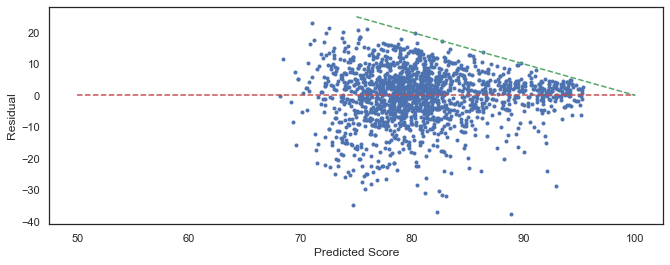

In [308]:
#Plot residuals as a function of predicted score
plt.plot(y_pred, res, '.')
plt.plot([50,100],[0,0],'r--')
plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Predicted Score')
plt.ylabel('Residual')

Red dashed line is residual of zero.  Points above represent schools that exceeded their prediction.  Green dashed line is an actual score of 100.

Text(0, 0.5, 'Residual')

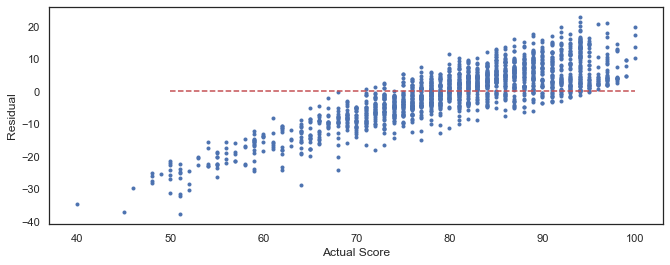

In [309]:
#Plot residuals as a function of actual score
plt.plot(y_test, res, '.')
plt.plot([50,100],[0,0],'r--')
#plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Actual Score')
plt.ylabel('Residual')

In [310]:
#Show how much each feature contributes to the model prediction
feature_importances = pd.DataFrame(RF_model.feature_importances_,
                                   index = df[features].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
ECON_DISADV_PCT    0.604541
LEP_PCT            0.110303
SPED_PCT           0.098673
SCHOOL_TYPE_S      0.079938
STUDENT_COUNT      0.071552
SCHOOL_TYPE_E      0.015647
SCHOOL_TYPE_M      0.015213
ECHS_PCT           0.002635
FLAG_CHARTER       0.001499
FLAG_NEW           0.000000
TSTEM_PCT          0.000000


## Step 5: Find an 'overperformance score' for each school

In [311]:
#Retrain a model using the data from all schools.
X_all = df[features].values
y_all = np.ravel(df[target].values)

RF_model_all = RandomForestRegressor(verbose=True, min_samples_leaf=30)
RF_model_all.fit(X_all, y_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=30,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [312]:
#Get a prediction score for each school based on the model.
df['PREDICTED_OVERALL_SCALED_SCORE'] = RF_model_all.predict(X_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [313]:
#Give each school an 'overperformance score'.
df['OVERPERFORMANCE'] = df['OVERALL_SCALED_SCORE']-df['PREDICTED_OVERALL_SCALED_SCORE']

#Sort dataframe by overperformance column and look at the top 20 schools.
df.sort_values(by=['OVERPERFORMANCE'], ascending=False).head(20)

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
5811,133903107,EARLY CHILDHOOD CENTER,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,KERRVILLE ISD,133903,E,1,0,0,71.764142,22.235858
6929,194902101,AVERY EL,B,86.0,83.0,A,91.0,100.0,A,100.0,...,0.0,A,AVERY ISD,194902,E,1,0,0,72.697867,21.302133
5544,123803041,TEKOA ACADEMY OF ACCELERATED STUDI,B,81.0,77.0,B,86.0,100.0,A,100.0,...,0.0,A,TEKOA ACADEMY OF ACCELERATED STUDI,123803,M,0,1,0,72.885706,21.114294
5977,152802101,RISE ACADEMY,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,RISE ACADEMY,152802,E,1,0,0,74.226876,20.773124
1157,31901106,GARDEN PARK EL,B,83.0,79.0,B,86.0,100.0,A,100.0,...,0.0,A,BROWNSVILLE ISD,31901,E,1,0,0,72.368426,20.631574
3285,76904101,ROTAN EL,B,86.0,70.0,C,72.0,100.0,A,100.0,...,0.0,A,ROTAN ISD,76904,E,1,0,0,72.413809,20.586191
3485,84902114,ROSENBERG EL LABORATORY FOR LEARNI,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,GALVESTON ISD,84902,E,1,0,0,73.526251,20.473749
6659,178905041,DRISCOLL EL & MIDDLE,A,91.0,74.0,C,79.0,100.0,A,100.0,...,0.0,A,DRISCOLL ISD,178905,E,1,0,0,73.710734,20.289266
4320,101912152,FIELD EL,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,HOUSTON ISD,101912,E,1,0,0,74.917400,20.082600
2845,68901106,CARVER EARLY EE-KG,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ECTOR COUNTY ISD,68901,E,1,0,0,73.052524,19.947476


In [314]:
#Search for a district.
df[df['DISTNAME'].str.contains("SPRING BRANCH")]

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
4802,101920108,MEADOW WOOD EL,A,90.0,74.0,C,79.0,73.0,C,76.0,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,87.781439,-1.781439
4812,101920118,WILCHESTER EL,A,94.0,89.0,A,94.0,100.0,A,100.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,95.225518,0.774482
4818,101920124,CEDAR BROOK EL,C,71.0,78.0,B,85.0,78.0,C,78.0,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,79.303652,3.696348
4814,101920120,SPRING SHADOW EL,D,60.0,65.0,D,62.0,24.0,D,60.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,78.316117,-13.316117
4809,101920115,VALLEY OAKS EL,A,93.0,83.0,A,91.0,87.0,B,82.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,91.834452,-1.834452
4781,101920005,NORTHBROOK H S,D,67.0,64.0,C,72.0,26.0,D,68.0,...,0.0,C,SPRING BRANCH ISD,101920,S,0,0,1,80.131074,-6.131074
4823,101920130,THE LION LANE SCHOOL,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,84.495587,1.504413
4791,101920045,SPRING FOREST MIDDLE,B,84.0,68.0,C,74.0,51.0,C,75.0,...,0.0,B,SPRING BRANCH ISD,101920,M,0,1,0,80.979495,0.020505
4793,101920047,NORTHBROOK MIDDLE,D,69.0,67.0,C,72.0,38.0,C,72.0,...,0.0,C,SPRING BRANCH ISD,101920,M,0,1,0,76.458538,1.541462
4800,101920106,HOUSMAN EL,F,57.0,67.0,D,67.0,31.0,D,63.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,78.956792,-12.956792


In [316]:
#For each campus, create a model using all other campuses then predict the overall scaled score for that campus.
y_pred = []
cnt = 0
total = df.shape[0]
for ind in df.index:
    RF_leave_out = RandomForestRegressor(min_samples_leaf=30)
    df_leave_out = df.drop([ind])
    X_train = df_leave_out[features].values
    X_test = df.loc[ind][features].values.reshape(1, -1)
    y_train = np.ravel(df_leave_out[target].values)
    y_test = np.ravel(df.loc[ind][target].values)
    RF_leave_out.fit(X_train, y_train)
    y_pred.append(RF_leave_out.predict(X_test))

In [336]:
#Replace predictions in dataframe
for i, ind in enumerate(df.index):
    df.at[ind, 'PREDICTED_OVERALL_SCALED_SCORE'] = y_pred[i]
    df.at[ind, 'OVERPERFORMANCE'] = df.loc[ind]['OVERALL_SCALED_SCORE'] - df.loc[ind]['PREDICTED_OVERALL_SCALED_SCORE']

In [340]:
#Sort dataframe by overperformance column and look at the top 20 schools.
df.sort_values(by=['OVERPERFORMANCE'], ascending=False).head(20)

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
3285,76904101,ROTAN EL,B,86.0,70.0,C,72.0,100.0,A,100.0,...,0.0,A,ROTAN ISD,76904,E,1,0,0,67.561302,25.438698
5977,152802101,RISE ACADEMY,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,RISE ACADEMY,152802,E,1,0,0,69.767740,25.232260
2845,68901106,CARVER EARLY EE-KG,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ECTOR COUNTY ISD,68901,E,1,0,0,67.776430,25.223570
2885,70903107,G W CARVER EARLY CHILDHOOD CENTER,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ENNIS ISD,70903,E,1,0,0,69.631877,24.368123
1242,31906110,DORA ROMERO EL,A,91.0,77.0,B,83.0,100.0,A,100.0,...,0.0,A,LOS FRESNOS CISD,31906,E,1,0,0,69.878688,24.121312
6929,194902101,AVERY EL,B,86.0,83.0,A,91.0,100.0,A,100.0,...,0.0,A,AVERY ISD,194902,E,1,0,0,70.745121,23.254879
5112,108904107,LEE EL,B,80.0,77.0,B,83.0,93.0,B,88.0,...,0.0,B,EDINBURG CISD,108904,E,1,0,0,66.329362,22.670638
2852,68901115,LAMAR EARLY EE-KG,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ECTOR COUNTY ISD,68901,E,1,0,0,74.403421,22.596579
5766,129905041,MABANK J H,B,88.0,82.0,A,91.0,99.0,A,99.0,...,0.0,A,MABANK ISD,129905,M,0,1,0,70.409991,22.590009
5811,133903107,EARLY CHILDHOOD CENTER,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,KERRVILLE ISD,133903,E,1,0,0,71.547819,22.452181


In [345]:
#Search for a district.
df[df['DISTNAME'].str.contains("SPRING BRANCH")]

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
4802,101920108,MEADOW WOOD EL,A,90.0,74.0,C,79.0,73.0,C,76.0,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,87.903189,-1.903189
4812,101920118,WILCHESTER EL,A,94.0,89.0,A,94.0,100.0,A,100.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,96.559948,-0.559948
4818,101920124,CEDAR BROOK EL,C,71.0,78.0,B,85.0,78.0,C,78.0,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,81.446961,1.553039
4814,101920120,SPRING SHADOW EL,D,60.0,65.0,D,62.0,24.0,D,60.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,77.277563,-12.277563
4809,101920115,VALLEY OAKS EL,A,93.0,83.0,A,91.0,87.0,B,82.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,91.661389,-1.661389
4781,101920005,NORTHBROOK H S,D,67.0,64.0,C,72.0,26.0,D,68.0,...,0.0,C,SPRING BRANCH ISD,101920,S,0,0,1,79.563075,-5.563075
4823,101920130,THE LION LANE SCHOOL,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,B,SPRING BRANCH ISD,101920,E,1,0,0,86.619950,-0.619950
4791,101920045,SPRING FOREST MIDDLE,B,84.0,68.0,C,74.0,51.0,C,75.0,...,0.0,B,SPRING BRANCH ISD,101920,M,0,1,0,81.577940,-0.577940
4793,101920047,NORTHBROOK MIDDLE,D,69.0,67.0,C,72.0,38.0,C,72.0,...,0.0,C,SPRING BRANCH ISD,101920,M,0,1,0,73.111413,4.888587
4800,101920106,HOUSMAN EL,F,57.0,67.0,D,67.0,31.0,D,63.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,79.131601,-13.131601
